In [1]:
import re
from collections import Counter
import pandas as pd

from tqdm.notebook import tqdm

from wordcloud import WordCloud


from pyvis.network import Network

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
data = pd.read_csv('yappy_hackaton_2024_400k.csv')
data.shape

(400000, 2)

In [3]:
all_tags = []
for line in data.description:
    if type(line) == str:
        all_tags += re.findall(r'#\w+', line)

In [4]:
word_cloud = WordCloud(
    collocations = False, 
    max_words = 100,
    background_color = 'white', 
    width = 2048, 
    height = 1024
).generate(' '.join(all_tags))

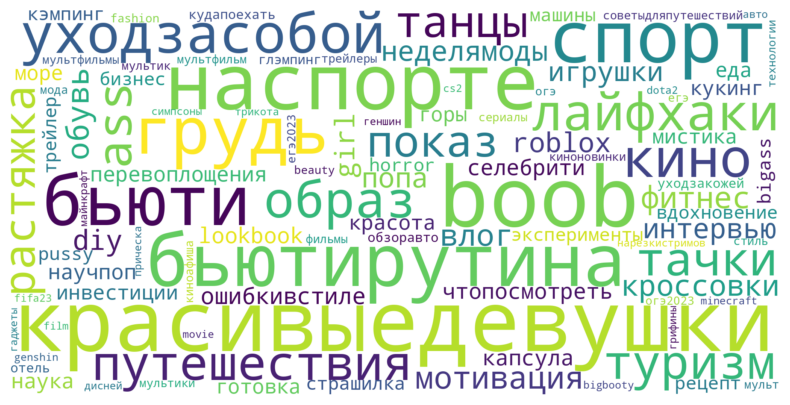

In [5]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

In [6]:
word_cloud = WordCloud(
    collocations = True, 
    max_words = 100,
    background_color = 'white', 
    width = 2048, 
    height = 1024
).generate(' '.join(all_tags))

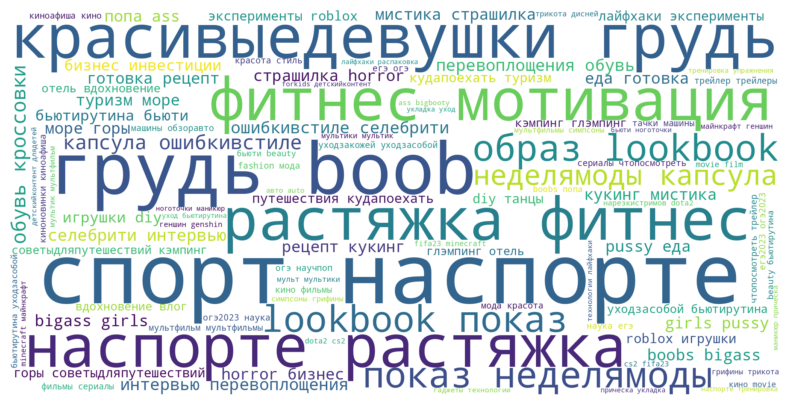

In [7]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
counter = Counter(all_tags)

In [9]:
import json
json.dump([i[0].replace(r'#', '') for i in counter.most_common(1000)], open('all_words.json', 'w'))

In [10]:
f'Количество уникальных тегов: {len(counter)}'

'Количество уникальных тегов: 28706'

In [11]:
counter.most_common(100)

[('#красивыедевушки', 38798),
 ('#boobs', 37669),
 ('#наспорте', 32589),
 ('#бьютирутина', 28538),
 ('#спорт', 28134),
 ('#бьюти', 25911),
 ('#грудь', 22795),
 ('#уходзасобой', 22330),
 ('#кино', 21532),
 ('#лайфхаки', 21390),
 ('#образ', 20858),
 ('#путешествия', 19050),
 ('#ass', 18794),
 ('#туризм', 18381),
 ('#тачки', 17880),
 ('#танцы', 15988),
 ('#показ', 15646),
 ('#растяжка', 15556),
 ('#мотивация', 15543),
 ('#обувь', 15176),
 ('#фитнес', 14813),
 ('#влог', 14658),
 ('#кроссовки', 14612),
 ('#неделямоды', 14609),
 ('#интервью', 14603),
 ('#diy', 14580),
 ('#попа', 14566),
 ('#игрушки', 14266),
 ('#ошибкивстиле', 14263),
 ('#roblox', 14262),
 ('#чтопосмотреть', 14259),
 ('#lookbook', 14234),
 ('#капсула', 14231),
 ('#селебрити', 14141),
 ('#перевоплощения', 14137),
 ('#наука', 13967),
 ('#научпоп', 13945),
 ('#красота', 13612),
 ('#готовка', 13341),
 ('#кукинг', 13304),
 ('#море', 13238),
 ('#инвестиции', 13162),
 ('#горы', 13151),
 ('#еда', 13104),
 ('#мистика', 13038),
 ('#эк

In [12]:
all_pairs = []
for line in data.description:
    if type(line) == str:
        tags = re.findall(r'#\w+', line)
        pairs = []
        for tag1 in tags:
            for tag2 in tags:
                if tag1 != tag2:
                    pairs.append(' '.join(sorted([tag1, tag2])))
        all_pairs += pairs

In [13]:
counter_pair = Counter(all_pairs)

In [14]:
f'Количество уникальных пар тегов: {len(counter_pair)}'

'Количество уникальных пар тегов: 205461'

In [15]:
counter_pair.most_common(100)

[('#бьюти #бьютирутина', 65272),
 ('#наспорте #спорт', 61766),
 ('#бьютирутина #уходзасобой', 55154),
 ('#boobs #красивыедевушки', 49544),
 ('#бьюти #уходзасобой', 48532),
 ('#грудь #красивыедевушки', 44942),
 ('#наспорте #растяжка', 39524),
 ('#boobs #грудь', 39246),
 ('#мотивация #наспорте', 38026),
 ('#наспорте #фитнес', 37806),
 ('#ass #красивыедевушки', 36966),
 ('#путешествия #туризм', 36726),
 ('#бьютирутина #уходзакожей', 35518),
 ('#растяжка #спорт', 30884),
 ('#ass #boobs', 30800),
 ('#образ #показ', 30690),
 ('#спорт #фитнес', 29530),
 ('#мотивация #спорт', 29446),
 ('#неделямоды #образ', 29212),
 ('#мотивация #растяжка', 29092),
 ('#мотивация #фитнес', 29086),
 ('#неделямоды #показ', 29072),
 ('#растяжка #фитнес', 29042),
 ('#образ #обувь', 28988),
 ('#кроссовки #обувь', 28794),
 ('#бьюти #уходзакожей', 28738),
 ('#кроссовки #образ', 28516),
 ('#образ #ошибкивстиле', 28512),
 ('#красивыедевушки #попа', 28504),
 ('#ошибкивстиле #показ', 28488),
 ('#неделямоды #ошибкивстиле',

In [16]:
unique_tags = [{'tag': tag, 'count': counter[tag]} for tag in set(i for i in all_tags if counter[i] > 250)]
min_count = min([i['count'] for i in unique_tags])
max_count = max([i['count'] for i in unique_tags])
min_value = 10
max_value = 50
for tag in unique_tags:
    tag['weight'] = (tag['count'] - min_count) / (max_count - min_count) * (max_value - min_value) + min_value

In [17]:
tag2id = {tag['tag']: i for i, tag in enumerate(unique_tags)}

In [18]:
mat = [[0] * len(unique_tags) for i in range(len(unique_tags))]
for line in data.description:
    if type(line) == str:
        tags = re.findall(r'#\w+', line)
        for tag1 in tags:
            for tag2 in tags:
                if tag1 != tag2 and tag1 in tag2id and tag2 in tag2id:
                    mat[tag2id[tag1]][tag2id[tag2]] += 1

In [19]:
G  = Network(height="1024", width="100%", notebook=True)
for i, tag in enumerate(unique_tags):
    G.add_node(i, label=tag['tag'], size=tag['weight'])

edges = []
for i in tqdm(range(len(mat))):
    for j in range(i+1, len(mat)):
        if mat[i][j] > 250:
            G.add_edge(i, j, weight=mat[i][j])

  0%|          | 0/394 [00:00<?, ?it/s]

In [20]:
G.toggle_physics(True)
G.show('tag_graph.html')

tag_graph.html
